 ## 📌 1. Datenaufbereitung & -exploration
Ziel: Die Daten bereinigen, verstehen und erste Erkenntnisse gewinnen.

✅ 1.1 Daten laden & erste Inspektion

Zuerst laden wir die zu bearbeitenden Daten als Datenrahmen. Schauen wir uns die Datentypen an und analysieren wir fehlende Werte.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
%matplotlib inline

pd.options.display.float_format = '{:.2f}'.format

In [2]:
def get_data(data: str):
    """The function takes a file name with the extension .csv and returns pd.DataFrame
    Args:
        data (str): File name 
    Returns:
        pd.DataFrame: DataFrame with loaded data 
    """
    df = pd.read_csv(data)
    return df
    
df = get_data("autoscout24.csv")    

In [3]:
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.00,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.00,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.00,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.00,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.00,2011


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


Unsere Daten umfassen 46.405 Zeilen (Datensätze) und 9 Spalten (Features), und 5 davon sind nicht numerische Typen.

In [5]:
df.isnull().sum()

mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64

---
✅ 1.2 Duplikate und fehlende Werte behandeln

Die fehlenden Daten betragen:

$$ \frac{143 + 182 + 29}{46405} \times 100 = 0.76\% $$

Da dies weniger als 1 % ist, können sie problemlos entfernt werden.

In [ ]:
df = df.dropna() # Remove missing data

In [ ]:
df.drop_duplicates(inplace=True) # Duplikate remote

In [8]:
df.isnull().sum()

mileage      0
make         0
model        0
fuel         0
gear         0
offerType    0
price        0
hp           0
year         0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43947 entries, 0 to 46399
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    43947 non-null  int64  
 1   make       43947 non-null  object 
 2   model      43947 non-null  object 
 3   fuel       43947 non-null  object 
 4   gear       43947 non-null  object 
 5   offerType  43947 non-null  object 
 6   price      43947 non-null  int64  
 7   hp         43947 non-null  float64
 8   year       43947 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.4+ MB


---
✅ 1.3 Datenverständnis durch Deskriptive Statistik

Ziel: Einen Überblick über die Daten bekommen, Verteilungen analysieren und mögliche Muster erkennen.

Da das Baujahr (year) nicht direkt aussagekräftig für die Analyse ist, sollten wir das Alter des Fahrzeugs berechnen.

In [10]:
df["age"] = datetime.now().year - df["year"]
df.drop(columns=["year"], inplace=True)

In [11]:
df.describe()

,mileage,price,hp,age
count,43947.00,43947.00,43947.00,43947.00
mean,72312.58,16546.56,133.62,9.07
std,62173.36,19446.80,75.05,3.12
min,0.00,1100.00,1.00,4.00
25%,21500.00,7490.00,86.00,6.00
50%,61309.00,10990.00,116.00,9.00
75%,106000.00,19490.00,150.00,12.00
max,1111111.00,1199900.00,850.00,14.00


---
1.3.3 Verteilung der numerischen Werte analysieren um zu erkennen, ob die Werte normalverteilt sind oder extreme Ausreißer enthalten

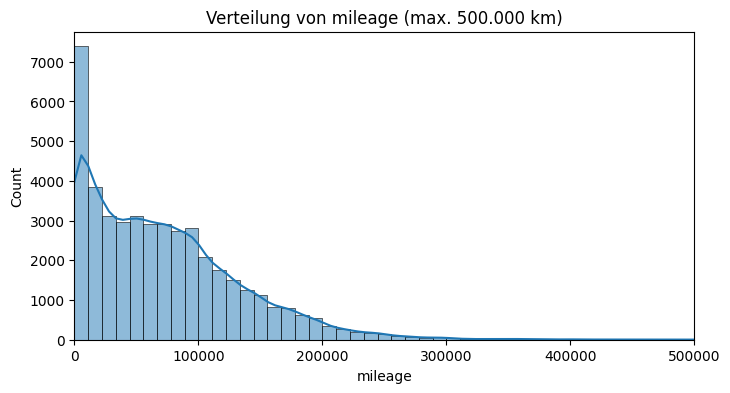

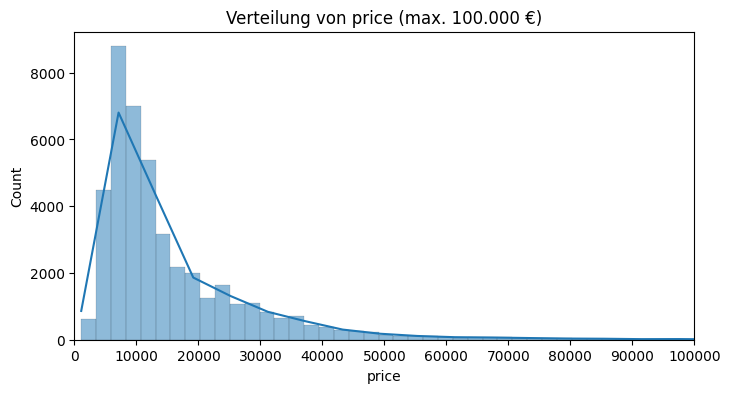

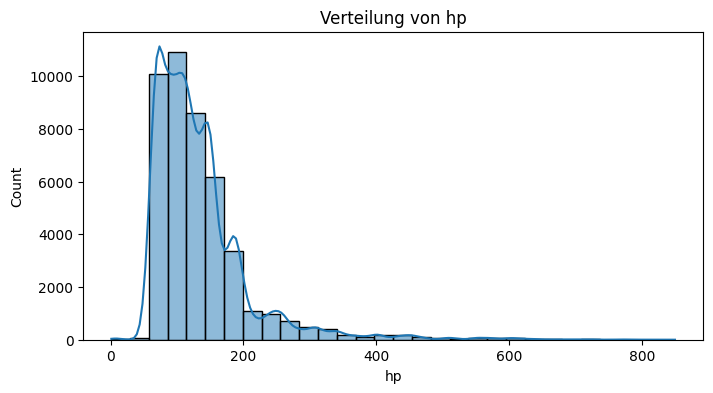

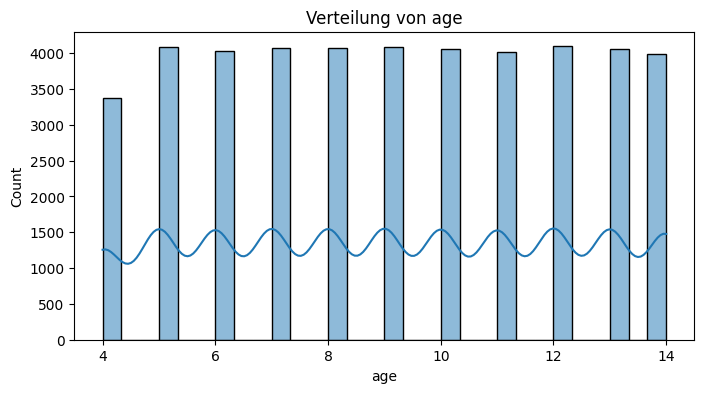

In [12]:
numerical_cols = ["mileage", "price", "hp", "age"]

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    if col == "mileage":
        sns.histplot(df["mileage"], bins=100, kde=True)
        plt.xlim(0, 500000)  # Begrenzung auf max. 500.000 km
        plt.title("Verteilung von mileage (max. 500.000 km)")
    elif col == "price":
        sns.histplot(df["price"], bins=500, kde=True)
        plt.xticks(np.arange(0, df["price"].max(), step=10000))
        plt.xlim(0, 100000)  # Begrenzung auf max. 100.000 €
        plt.title("Verteilung von price (max. 100.000 €)")    
    else:    
        sns.histplot(df[col], bins= 30, kde=True)
        plt.title(f"Verteilung von {col}")
        
    plt.show()
    
    

Aus diesen Histogrammen ging hervor, dass ein Großteil der Autos über 7.000 eine Laufleistung von etwa 10.000 km aufweist. Sie können auch sehen, dass eine große Anzahl von Autos mit Preisen zwischen 3.000 und 15.000 verkauft werden. Die Leistung der meisten Maschinen liegt zwischen 50 und 200 PS. Die Altersverteilung der Autos ist völlig normal. Offensichtlich gibt es etwas weniger neuere Autos.

1.3.4 Häufigkeit von Kategorien analysieren. Welche Automarken (make) kommen am häufigsten vor?

In [13]:
print(df["make"].unique())
print(df["make"].nunique())

['BMW' 'Volkswagen' 'SEAT' 'Renault' 'Peugeot' 'Toyota' 'Opel' 'Mazda'
 'Ford' 'Mercedes-Benz' 'Chevrolet' 'Audi' 'Fiat' 'Kia' 'Dacia' 'MINI'
 'Hyundai' 'Skoda' 'Citroen' 'Infiniti' 'Suzuki' 'SsangYong' 'smart'
 'Cupra' 'Volvo' 'Jaguar' 'Porsche' 'Nissan' 'Honda' 'Mitsubishi' 'Lexus'
 'Jeep' 'Maserati' 'Bentley' 'Land' 'Alfa' 'Subaru' 'Dodge' 'Microcar'
 'Lamborghini' 'Lada' 'Tesla' 'Chrysler' 'McLaren' 'Aston' 'Rolls-Royce'
 'Lancia' 'Abarth' 'DS' 'Daihatsu' 'Ligier' 'Ferrari' 'Aixam' 'Zhidou'
 'Morgan' 'Maybach' 'RAM' 'Alpina' 'Polestar' 'Brilliance' 'Piaggio'
 'FISKER' 'Others' 'Cadillac' 'Iveco' 'Isuzu' 'Corvette' 'Baic' 'DFSK'
 'Estrima' 'Alpine']
71


In [65]:
print(df["gear"].unique())

['Manual' 'Automatic' 'Semi-automatic']


In [68]:
print(df["model"].unique()) 

['Golf' 'Exeo' 'Megane' '308' 'Auris' 'Scenic' 'Zafira' '3' 'Transit'
 'Meriva' 'Orlando' 'A4' 'Polo' 'Espace' 'Grand Espace' 'Sedici' 'Corsa'
 'Picanto' 'Duster' 'Cross Touran' 'Beetle' 'Golf Cabriolet' 'Astra' '118'
 'Focus' 'One D Countryman' 'Cooper Clubman' 'B 180' 'Insignia' 'One'
 '320' 'iX35' 'Adam' 'B-Max' 'Golf Variant' 'Touran' '114' 'Galaxy' 'Leon'
 'A1' 'Trax' 'Verso' 'Golf Plus' 'Fiesta' 'Vivaro' 'Yaris' 'iX20' 'up!'
 'Rapid/Spaceback' '116' 'Passat Variant' "Ceed / cee'd" 'Fabia' 'Ibiza'
 'C-Max' 'Superb' 'C4 Cactus' '208' '316' 'Swift' 'Korando' 'Sandero' '2'
 'Sorento' 'GLC 220' 'A6' 'E 400' 'forTwo' 'Mii' 'Citigo' 'Aygo' 'Punto'
 'i10' 'forFour' 'A6 allroad' 'A4 allroad' 'GLC 250' 'Q2' 'Tiguan' 'Ateca'
 'Amarok' 'Q5' 'SQ5' 'Q7' 'M2' 'XC90' 'X3' 'X2' 'T-Roc' 'Vito' 'Kuga'
 'Karoq' 'GLA 250' 'Alhambra' 'RS Q3' 'TT RS' 'F-Type' 'Macan' 'Touareg'
 'A7' 'S5' 'T6 California' 'Q8' 'Panda' '508' 'Qashqai' 'Civic' 'Passat'
 'Avensis' 'Octavia' 'Altea' 'Mondeo' 'Jetta' 'i40' 'G

In [67]:
print(df["offerType"].unique())

['Used' 'Demonstration' "Employee's car" 'Pre-registered' 'New']


In [64]:
print(df["fuel"].unique())

['Gasoline' 'Electric/Gasoline' 'Diesel' '-/- (Fuel)' 'Electric'
 'Electric/Diesel' 'LPG' 'CNG' 'Others' 'Hydrogen' 'Ethanol']


In [14]:
print(df["make"].value_counts())

make
Volkswagen    6680
Opel          4576
Ford          4245
Skoda         2737
Renault       2659
              ... 
Brilliance       1
Others           1
FISKER           1
Isuzu            1
Alpine           1
Name: count, Length: 71, dtype: int64


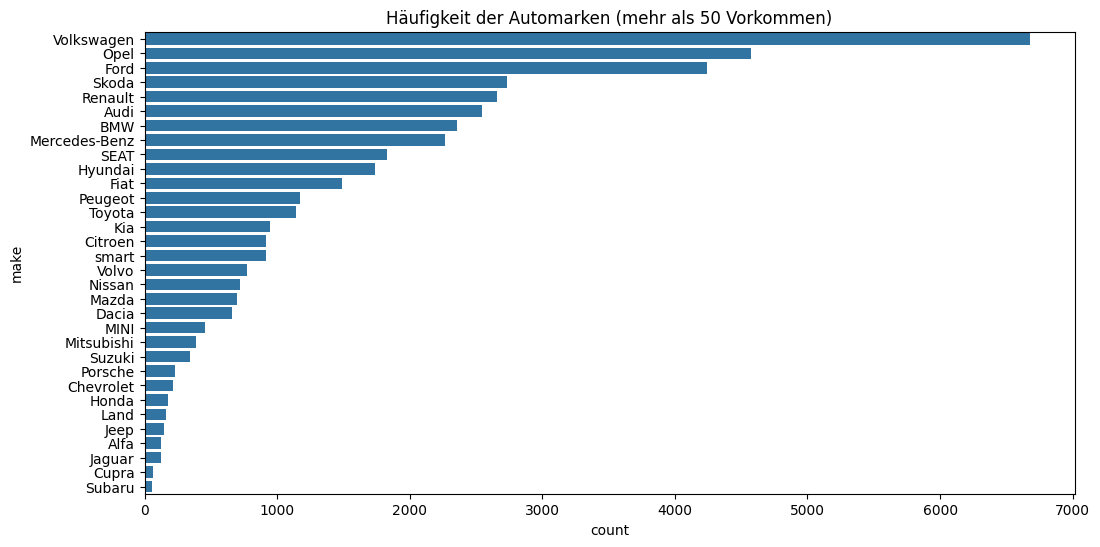

In [15]:
# Filtern der Marken mit mehr als 50 Vorkommen
filtered_make = df["make"].value_counts()[df["make"].value_counts() > 50].index

# Plot erstellen
plt.figure(figsize=(12, 6))
sns.countplot(y=df["make"], order=filtered_make)
plt.title("Häufigkeit der Automarken (mehr als 50 Vorkommen)")
plt.show()

Ergebnis: 

Die meistverkauften Autos in Deutschland sind Fahrzeuge der heimischen Marken wie Volkswagen, Opel, Audi, BMW, Mercedes-Benz sowie Ford, Skoda und Renault.

---
✅ 1.4 Datenvisualisierung zur ersten Analyse

Ziel: Wichtige Zusammenhänge erkennen, Ausreißer identifizieren und erste Hypothesen über Einflussfaktoren ableiten.

1.4.1 Boxplots zur Erkennung von Ausreißern

Boxplots helfen dabei, extreme Werte zu erkennen, z. B. für mileage:

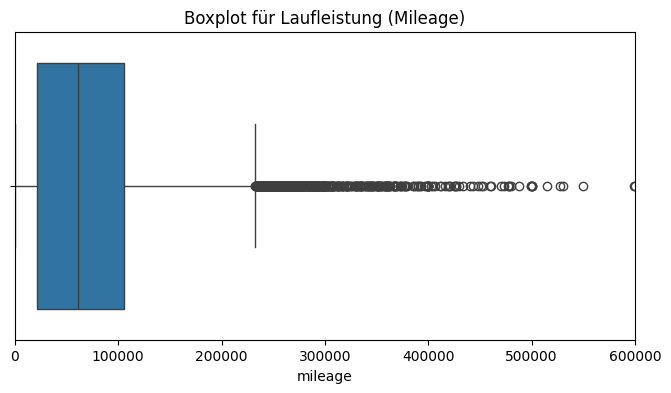

In [16]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["mileage"])
plt.xlim(0, 600000)  # Begrenzung auf max. 500.000 km
plt.title("Verteilung von mileage (max. 500.000 km)")
plt.title("Boxplot für Laufleistung (Mileage)")
plt.show()

Das Boxplot zeigt extreme Ausreißer, die den Datenbereich vergrößern. Wir werden diese Ausreißer mithilfe der IQR (Interquartile Range) entfernen.
$$ IQR = Q3 - Q1 $$



In [17]:
Q1 = df["mileage"].quantile(0.25)
Q3 = df["mileage"].quantile(0.75)
IQR = Q3 - Q1
df = df[(df["mileage"] >= Q1 - 1.5 * IQR) & (df["mileage"] <= Q3 + 1.5 * IQR)]

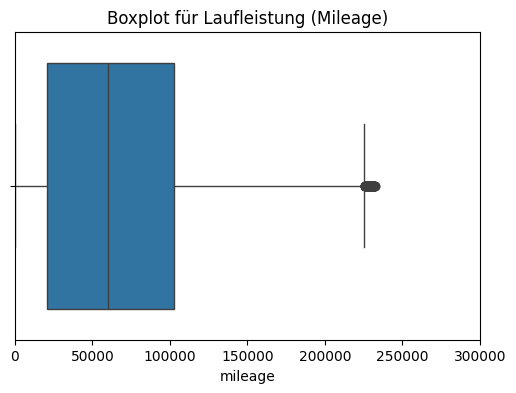

In [18]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["mileage"])
plt.xlim(0, 300000)  # Begrenzung auf max. 300.000 km
plt.title("Verteilung von mileage (max. 300.000 km)")
plt.title("Boxplot für Laufleistung (Mileage)")
plt.show()

---
1.4.2 Korrelationen zwischen Variablen berechnen

Welche Variablen hängen zusammen? Eine Korrelationsmatrix hilft:

In [19]:
# Take only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation
correlation_matrix = numeric_df.corr()

print(correlation_matrix)

         mileage  price    hp   age
mileage     1.00  -0.32 -0.04  0.71
price      -0.32   1.00  0.75 -0.41
hp         -0.04   0.75  1.00 -0.19
age         0.71  -0.41 -0.19  1.00


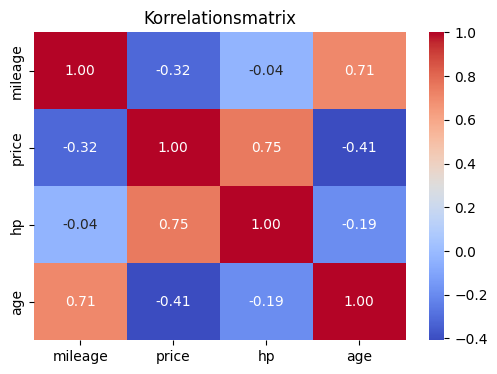

In [20]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korrelationsmatrix")
plt.show()

Erkentnisse:

Die Leistung (hp) am stärksten mit dem Preis korreliert → je stärker das Auto, desto teurer ist es.

Das Alter (age) stark negativ mit dem Preis korreliert → Ältere Autos sind günstiger.

Die Kilometerleistung (mileage) außerdem negativ mit dem Preis korreliert → je höher die Kilometerleistung, desto günstiger.


---
1.4.3 Scatterplots 

Das Streudiagramm zeigt die Beziehung zwischen den numerischen Merkmalen (PS) und dem Preis:

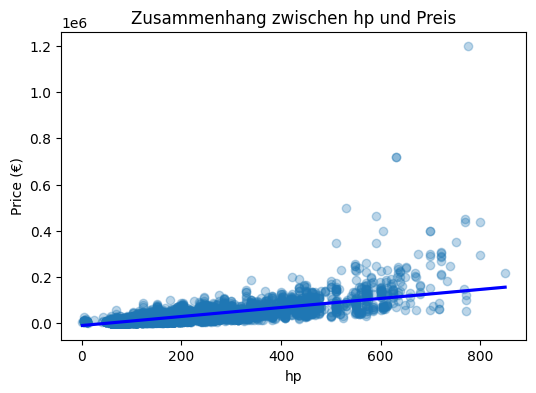

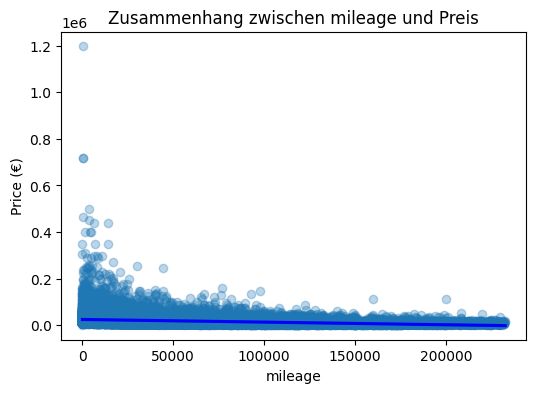

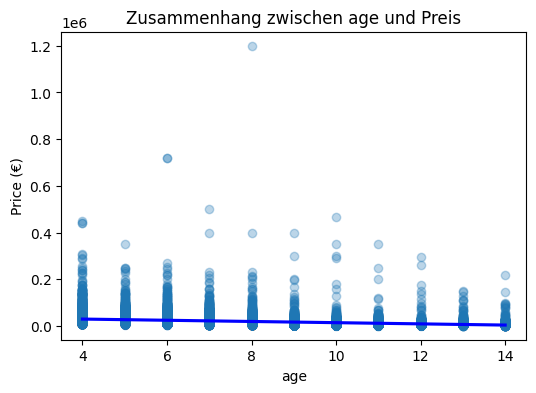

In [21]:
corr_cols = [ "hp", "mileage", "age"]

for col in corr_cols:
    plt.figure(figsize=(6, 4))
    # Wir konstruieren ein Streudiagramm mit einer zusätzlichen Regressionsgerade
    sns.regplot(x=df[col], y=df["price"], scatter_kws={'alpha':0.3}, line_kws={'color':'blue'})
    plt.title(f"Zusammenhang zwischen {col} und Preis")
    plt.xlabel(f"{col}")
    plt.ylabel("Price (€)")
    plt.show()
    
    

Typische Erwartung: 
- Je höher die Leistung, desto höher der Preis. 
- Je weniger mileage, desto höher der Preis.
- Je neuer das Auto, desto höher der Preis


---
## 📌 2. Feature Engineering & Vorbereitung für ML
Ziel: Daten für das Machine Learning-Modell vorbereiten.

✅ 2.1 Umwandlung von kategorialen Variablen (Feature Encoding)

Maschinen lernen nicht mit Text, daher müssen kategoriale Variablen (make, model, fuel, gear, offerType) in Zahlen umgewandelt werden.

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_transform = pd.DataFrame()
df_transform['make'] = le.fit_transform(df['make'])  
df_transform['model'] = le.fit_transform(df ['model'])
df_transform['fuel'] = le.fit_transform(df ['fuel'] )	
df_transform['gear'] = le.fit_transform(df ['gear'])	
df_transform['offerType'] = le.fit_transform(df ['offerType'])

---
✅ 2.2 Skalierung der numerischen Variablen

ML-Modelle funktionieren besser, wenn numerische Werte in ähnlichem Maßstab liegen. Ich benutze StandardScaler um Werte zu skalieren

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_transform[['mileage', 'price', 'hp', 'age']] = scaler.fit_transform(df[['mileage', 'price', 'hp', 'age']])

Zeigt die Verteilung und Ausreißer der Daten.
Erstellen eines Boxplots für price

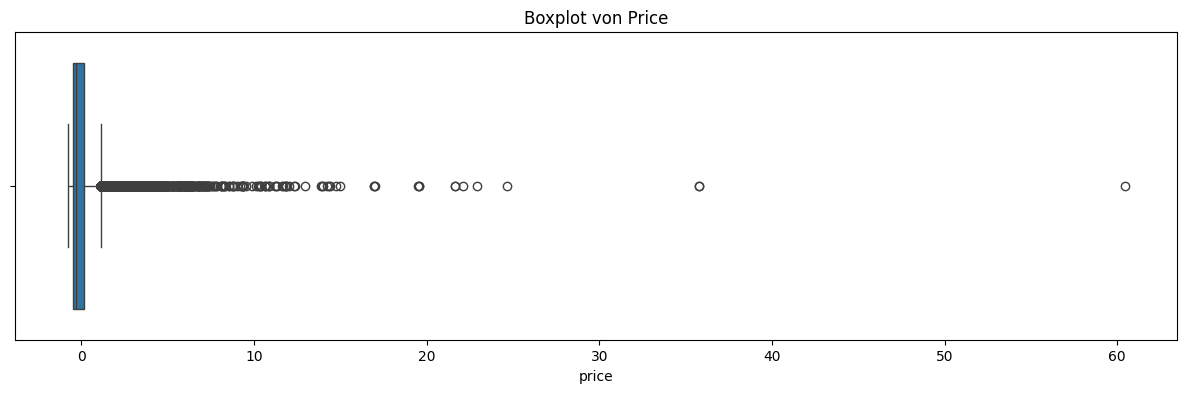

In [37]:
plt.figure(figsize=(15,4))
sns.boxplot(x=df_transform["price"])
plt.title("Boxplot von Price")
plt.show()

Entfernen von Ausreißern mit der IQR-Methode, um die Daten auf die Dialyse einzugrenzen

In [38]:
Q1 = df_transform["price"].quantile(0.25)
Q3 = df_transform["price"].quantile(0.75)
IQR = Q3 - Q1  # Interquartilsabstand
df_transform = df_transform[(df_transform["price"] >= Q1 - 1.5 * IQR) & (df_transform["price"] <= Q3 + 1.5 * IQR)]

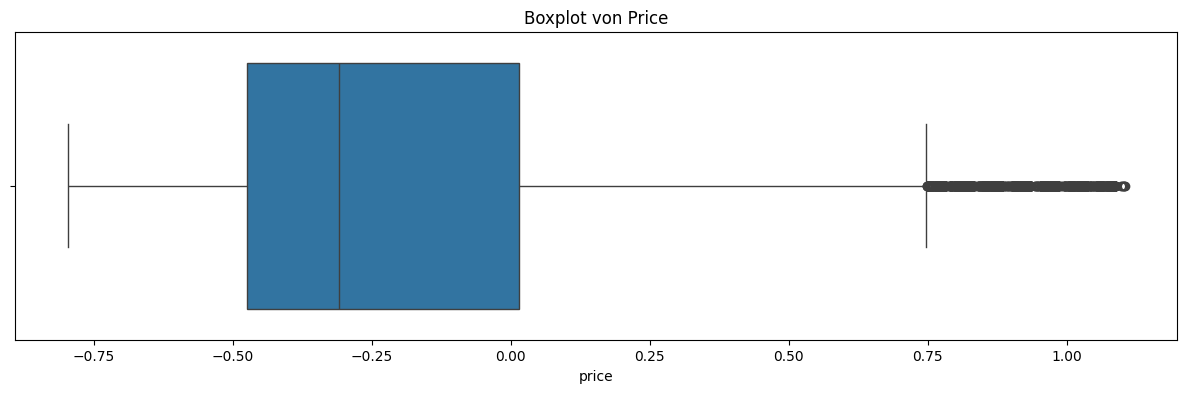

In [39]:
plt.figure(figsize=(15,4))
sns.boxplot(x=df_transform["price"])
plt.title("Boxplot von Price")
plt.show()

#### ✅ 2.4 Pairplot zur Merkmalsanalyse.
Ein Pairplot zeigt Korrelationen zwischen Features.

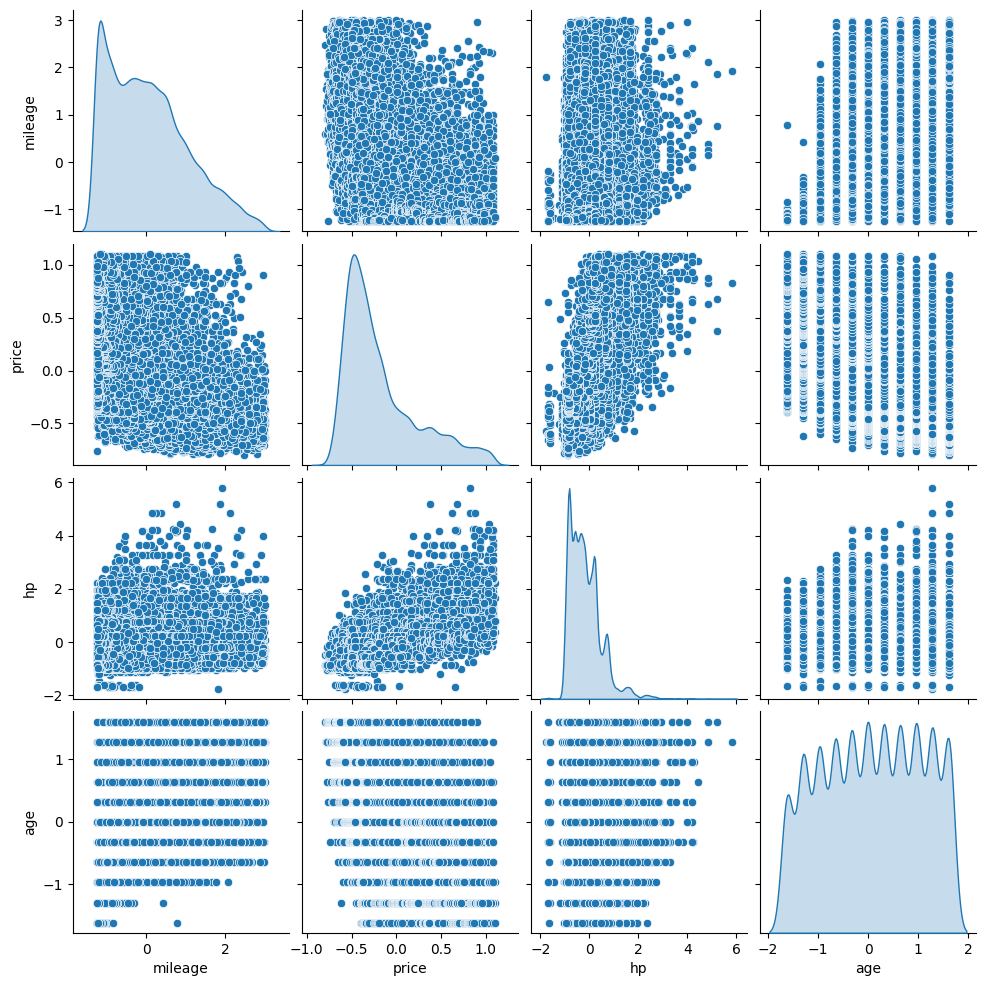

In [43]:
sns.pairplot(df_transform,vars=["mileage", "price", "hp", "age"], diag_kind="kde")
plt.show()

---
✅ 2.5 Aufteilung in Trainings- und Testdaten

Bevor wir unser ML-Modell trainieren, müssen wir die Daten aufteilen:

- Trainingsset (80%) → Modell lernt.
- Testset (20%) → Modell wird geprüft.

In [40]:
from sklearn.model_selection import train_test_split

X = df_transform.drop(columns='price')
y = df_transform['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

🚀 Fazit

1️⃣ Kategoriale Variablen mit LabelEncoder umwandeln

2️⃣ Numerische Werte skalieren mit StandardScaler für normalverteilte Daten

3️⃣ Boxplots analysieren und IQR-Methode verwenden um Ausreißer zu reduzieren

4️⃣ Trainings- und Testsplit vorbereiten: 80% Training, 20% Test mit train_test_split()

5️⃣ Pairplot erstellen, um Beziehungen zwischen Variablen zu verstehen

---
## 📌 3. Erste Machine-Learning-Modelle testen (Lineare Regression & mehr)

Hier geht es darum, ein Modell zur Preisvorhersage zu erstellen und es mit anderen Modellen zu vergleichen.

### ✅ 3.1 Lineare Regression anwenden

Warum?

Die Lineare Regression ist das einfachste Modell und hilft, erste Zusammenhänge zwischen Features und Preis zu erkennen.

✅ 3.1.1 Modell erstellen & trainieren

In [48]:
from sklearn.linear_model import LinearRegression

# Modell initialisieren
lr_model = LinearRegression()

# Modell trainiren 
lr_model.fit(X_train, y_train)

# Prediction
lr_y_pred =lr_model.predict(X_test)


✅ 3.1.2 Fehlerbewertung (MSE, RMSE, R²)
📌 Warum Fehler messen? → Wir wollen wissen, wie gut das Modell arbeitet.



In [49]:
from sklearn.metrics import mean_squared_error, r2_score

# Mean Squered Error
mse = mean_squared_error(y_test, lr_y_pred)

# Rood Mean Squered Error
rmse = np.sqrt(mse)

# R² (coefficient of determination) – shows how well the predictions fit reality (1 = perfect)
r2 = r2_score(y_test, lr_y_pred)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R² Score: {r2:.4f}')

MSE: 0.03
RMSE: 0.16
R² Score: 0.8443


### ✅ 3.2 Vergleich mit anderen Algorithmen (optional)
Warum?
Ein einfaches lineares Modell reicht oft nicht aus. Baum-Modelle (Decision Tree, Random Forest) können besser mit nicht-linearen Beziehungen umgehen.

In [50]:
from sklearn.tree import DecisionTreeRegressor

# Initialize model
tree_model = DecisionTreeRegressor()

# Model train
tree_model.fit(X_train, y_train)

# Prediction
tree_y_pred = tree_model.predict(X_test)

In [52]:
# Measuring errors
mse_tree = mean_squared_error(y_test, tree_y_pred)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, tree_y_pred)

print(f"Decision Tree MSE: {mse_tree:.2f}")
print(f"Decision Tree RMSE: {rmse_tree:.2f}")
print(f"Decision Tree R² Score: {r2_tree:.4f}")

Decision Tree MSE: 0.02
Decision Tree RMSE: 0.14
Decision Tree R² Score: 0.8889


### ✅ 3.3 Random Forest Regressor 🌲🌲🌲
Ein Random Forest kombiniert viele Entscheidungsbäume und macht bessere Vorhersagen.

In [56]:
from sklearn.ensemble import RandomForestRegressor

# Initialize model
rf_model = RandomForestRegressor(n_estimators=100,random_state=42)

# Model train
rf_model.fit(X_train, y_train)

# Prediction
rf_y_pred = rf_model.predict(X_test)

In [57]:
# Measuring errors
mse_rf = mean_squared_error(y_test, rf_y_pred)

rmse_rf= np.sqrt(mse_rf)

r2_rf = r2_score(y_test, rf_y_pred)

print(f"Decision MSE Random Forest: {mse_rf:.2f}")
print(f"Decision RMSE Random Forest: {rmse_rf:.2f}")
print(f"Decision R² Score Random Forest: {r2_rf:.2f}")




Decision MSE Random Forest: 0.01
Decision RMSE Random Forest: 0.10
Decision R² Score Random Forest: 0.94


📌 Die besten Ergebnisse wurden mit dem Random Forest erzielt.

### ✅ 3.4 Hyperparameter-Tuning mit GridSearchCV
Warum?

Standard-Parameter sind oft nicht optimal.
GridSearchCV testet verschiedene Einstellungen und findet die besten Parameter.
Optimierung für Random Forest

In [69]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300], # Trees amount
    'max_depth': [None, 20, 30], # Max depth
    'min_samples_split': [2, 5, 10] # Min amount of samples pro split
}
# GridSearchCV initialize
# cv=3 means 3-fold cross validation
grid_search = GridSearchCV(RandomForestRegressor(random_state=42),
                param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
# Model training
grid_search.fit(X_train, y_train)

# Best score
print("Beste Parameter: ", grid_search.best_params_)

# Get best model
best_rf_model = grid_search.best_estimator_

# New prediction
y_pred_best = best_rf_model.predict(X_test)
 

Beste Parameter:  {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 300}


In [70]:
# Measure errors
mse_best = mean_squared_error(y_test,y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test,y_pred_best)

print(f"Optimiertes RF MSE: {mse_best:.2f}")
print(f"Optimiertes RF RMSE: {rmse_best:.2f}")
print(f"Optimiertes RF R² Score: {r2_best:.4f}")

Optimiertes RF MSE: 0.01
Optimiertes RF RMSE: 0.10
Optimiertes RF R² Score: 0.9382


Das Experiment mit Hyperparametern brachte nicht die gewünschten Ergebnisse. Die Verwendung von Standardparametern zeigte das beste Ergebnis. n_estimators=100